In [3]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
import random

#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] =15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]


# Getting Experimental Binding Energies

In [4]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016-Copy1.dat',usecols=(3,4,5))
exp_energies=np.transpose(exp_energies)
exp_energies[2]=-exp_energies[2]
exp_energies=np.transpose(exp_energies)


exp_energies_d={}

for i in exp_energies:
    exp_energies_d[i[0],i[1]]=i

#EXP ENERGIES: N, Z, EXP E
#the_energies: N,Z,T_BE,Q,S_n,S_p

print(np.shape(exp_energies))
print("0: ", exp_energies[0])

(3433, 3)
0:  [1.       1.       2.224552]


# Theoretical

In [5]:
#theoretical importing relevent data
#Symbolm Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9

the_energies= [[],[], [], [], [], [],]

the_names   =['SKMS_all_nuclei-new-Copy1.dat',
              'SKP_all_nuclei-Copy1.dat',
              'SLY4_all_nuclei-new-Copy1.dat',
              'SV-MIN_all_nuclei-new-Copy1.dat',
              'UNEDF0_all_nuclei-new-Copy1.dat',
              'UNEDF1_all_nuclei-new-Copy1.dat']

#the_energies: N,Z,T_BE,Q,S_n,S_p

the_energies[0] = np.genfromtxt('SKMS_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))   
the_energies[1] = np.genfromtxt('SKP_all_nuclei-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[2] = np.genfromtxt('SLY4_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[3] = np.genfromtxt('SV-MIN_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[4] = np.genfromtxt('UNEDF0_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[5] = np.genfromtxt('UNEDF1_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))

  
    



for i in range(0,6):   
    the_energies[i]=np.transpose(the_energies[i])
    the_energies[i][2]=-the_energies[i][2]
    the_energies[i]=np.transpose(the_energies[i])
    #print(len(the_energies[i]))

print(the_energies[0][0])
print(the_energies[1][0])
print(the_energies[2][0])


[ 2.       2.      30.01944      nan      nan      nan]
[ 2.        2.       29.983718       nan       nan       nan]
[ 2.        2.       30.710089       nan       nan       nan]


# Removing NaN values in the theoretical data set

In [6]:
 
the_nonan_energies                       =[[],[],[],[],[],[]]
for i in range(0,6):
    for the_energies_i in the_energies[i]:
        if math.isnan(the_energies_i[0]) or math.isnan(the_energies_i[2]) or math.isnan(the_energies_i[3]) or math.isnan(the_energies_i[4]) or math.isnan(the_energies_i[5]):
           x=1
        else:
            the_nonan_energies[i].append(the_energies_i)
            

the_energies=the_nonan_energies

print(the_energies[0][0])
print(the_energies[1][0])
print(the_energies[2][0])


[ 4.        4.       56.131949  2.187491 15.274275 13.806724]
[ 4.        4.       56.070979  2.212739 15.550024 14.131022]
[ 4.        4.       55.470044  3.540045 16.069022 14.659086]


# Creating Dictionaries

In [7]:

the_energies_d   =[{},{},{},{},{},{},]
for i in range(0,6):
    for the_energies_i in the_energies[i]:
        #print(np.shape(the_range_i))
        the_energies_d[i][the_energies_i[0],the_energies_i[1]]=the_energies_i
        #print(the_range_d[i][the_range_i[0],the_range_i[1]])
        
    

# Finding where the experimental and theoretical overlap

In [8]:
the_exp_mat_energies=[[],[],[],[],[],[]]
the_exp_mat_energies_d=[{},{},{},{},{},{}]


#EXP ENERGIES:          N,||Z,||      || E_BE,||            ||   ||     ||
#the_energies:          N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p
#the_exp_mat_energies:  N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p
#the_no_mat_energies:   N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p

for i in range(0,6):
    
    
    for exp_energies_i in exp_energies:  
        try:
            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]]
            
            
            # Neutron, Proton, T_BE, E_BE, difference, Q, S_n, S_p
            
            #N
            a=exp_energies_i[0]
            #Z
            b=exp_energies_i[1]
            #T_BE
            c=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]
            #E_BE
            d=exp_energies_i[2]
            #difference
            e=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]-exp_energies_i[2]
            #Q
            f=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][3]
            #S_n
            g=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][4]
            #S_p
            h=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][5]
            
            
            arr=np.array((a,b,c,d,e,f,g,h))
            the_exp_mat_energies[i].append(arr)
            the_exp_mat_energies_d[i][exp_energies_i[0],exp_energies_i[1]]=arr
            

        except KeyError:
            continue
        

the_no_mat_energies  =[[],[],[],[],[],[]]
the_no_mat_energies_d=[{},{},{},{},{},{}]

for i in range(0,6):
    for the_energies_i in the_energies[i]:
        try:
            exp_energies_d[the_energies_i[0],the_energies_i[1]]
            
        except KeyError:
            the_no_mat_energies[i].append(the_energies_i)
            the_no_mat_energies_d[i][the_energies_i[0],the_energies_i[1]]=the_energies_i
            
            continue


 

# Finding the reference nuclei

range(0, 125, 5)


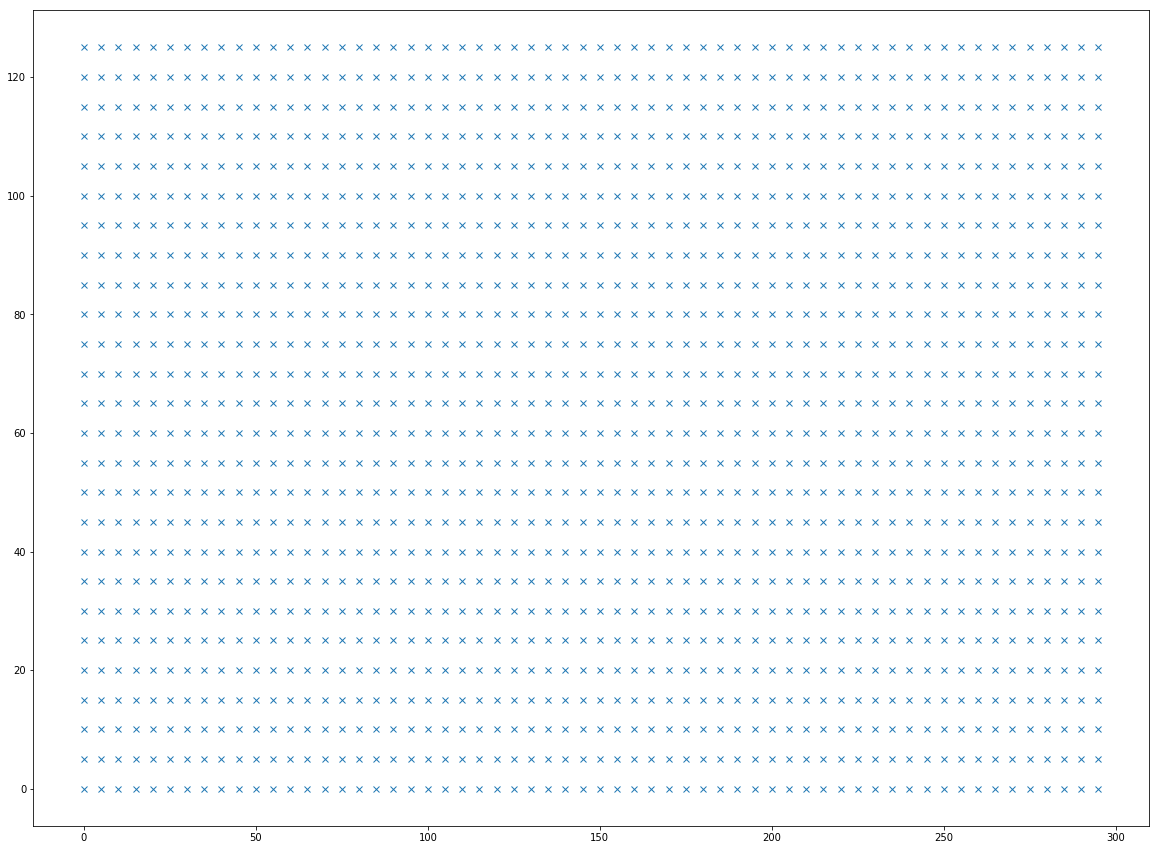

In [9]:
vert=range(0,125,5)
hori=range(0,125,5)
#plt.plot(vert,hori,'x')
#plt.show()
print(vert)
combo=[]
for i in range(0,126,5):
    for j in range(0,300,5):
        combo.append((j,i))
    
plt.plot(np.transpose(combo)[0],np.transpose(combo)[1],'x')
plt.show()


In [13]:
#out_refs MAKE OUT_REFS 
#in_refs  MAKE IN_REFS

out_refs  =[[],[],[],[],[],[]]
in_refs   =[[],[],[],[],[],[]]



a=[60,61,62,63,64, 60,61,62,63,64, 60,61,62,63,64, 60,61,62,63,64]
b=[44,44,44,44,44, 45,45,45,45,45, 46,46,46,46,46, 47,47,47,47,47]
c=[110,111,112,113,114, 110,111,112,113,114, 110,111,112,113,114, 110,111,112,113,114, ]
d=[60,60,60,60,60,      61,61,61,61,61,      62,62,62,62,62,      63,63,63,63,63, ]

a=[ 8, 20, 28,50,  82, 126]
refs=[]
for i in a:
    for j in a:
        refs.append((i,j))

        
for i in range(0,6):
    for j in refs:
        try:
            #print(j[0],j[1])
            out_refs[i].append(the_no_mat_energies_d[i][j[0],j[1]])
        
        except KeyError:
            continue
        
        
        
for i in range(0,6):
    for j in refs:
        try:
            #print(j[0],j[1])
            in_refs[i].append(the_exp_mat_energies_d[i][j[0],j[1]])
        
        except KeyError:
            continue
        
     
#f=(a,b) 
#f=np.transpose(f)
#l=(c,d) 
#l=np.transpose(l)
for i in range(0,6):
    print(np.shape(in_refs[i]))
    print(np.shape(out_refs[i]), "\n")
    

(10, 8)
(2, 6) 

(8, 8)
(0,) 

(8, 8)
(0,) 

(9, 8)
(1, 6) 

(9, 8)
(1, 6) 

(8, 8)
(1, 6) 



In [12]:
for i in range(0,6):
    
    for j in range(0,20):
        in_refs[i].append(random.choice(the_exp_mat_energies[i]))
        out_refs[i].append(random.choice(the_no_mat_energies[i]))
        
        #refs clumped
        in_refs[i].append(the_exp_mat_energies_d[i][f[j][0],f[j][1]])
        out_refs[i].append(the_no_mat_energies_d[i][l[j][0],l[j][1]])
     
for i in range(0,6):
    for j in combo:
        try:
            in_nuc=the_exp_mat_energies_d[i][j[0], j[1]]
            in_refs[i].append(in_nuc)
            
        except KeyError:
            continue
        

for i in range(0,6):
    for j in combo:
        try:
            out_nuc=the_no_mat_energies_d[i][j[0], j[1]]
            out_refs[i].append(out_nuc)
            
        except KeyError:
            continue
        

IndexError: invalid index to scalar variable.

In [14]:
for i in range(0,6):
    print(np.shape(in_refs[i]))
    print(np.shape(out_refs[i]))
    

(10, 8)
(2, 6)
(8, 8)
(0,)
(8, 8)
(0,)
(9, 8)
(1, 6)
(9, 8)
(1, 6)
(8, 8)
(1, 6)


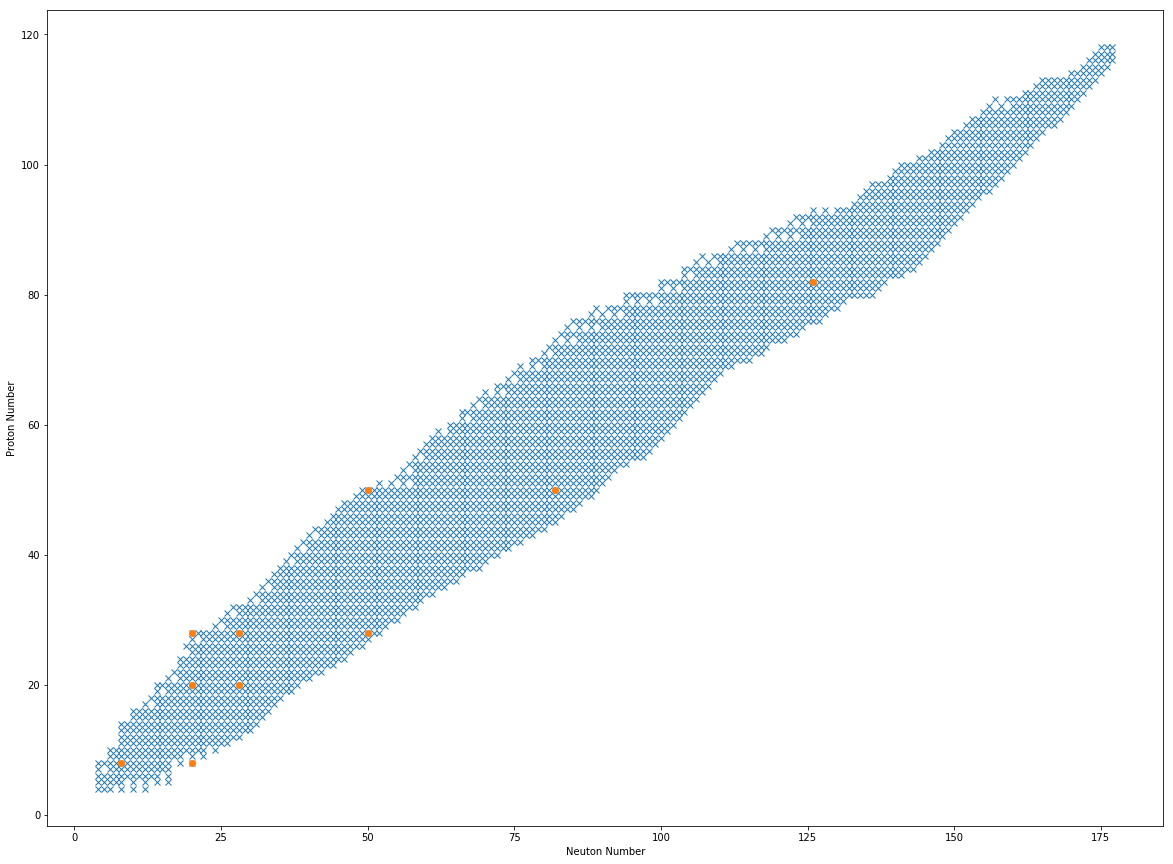

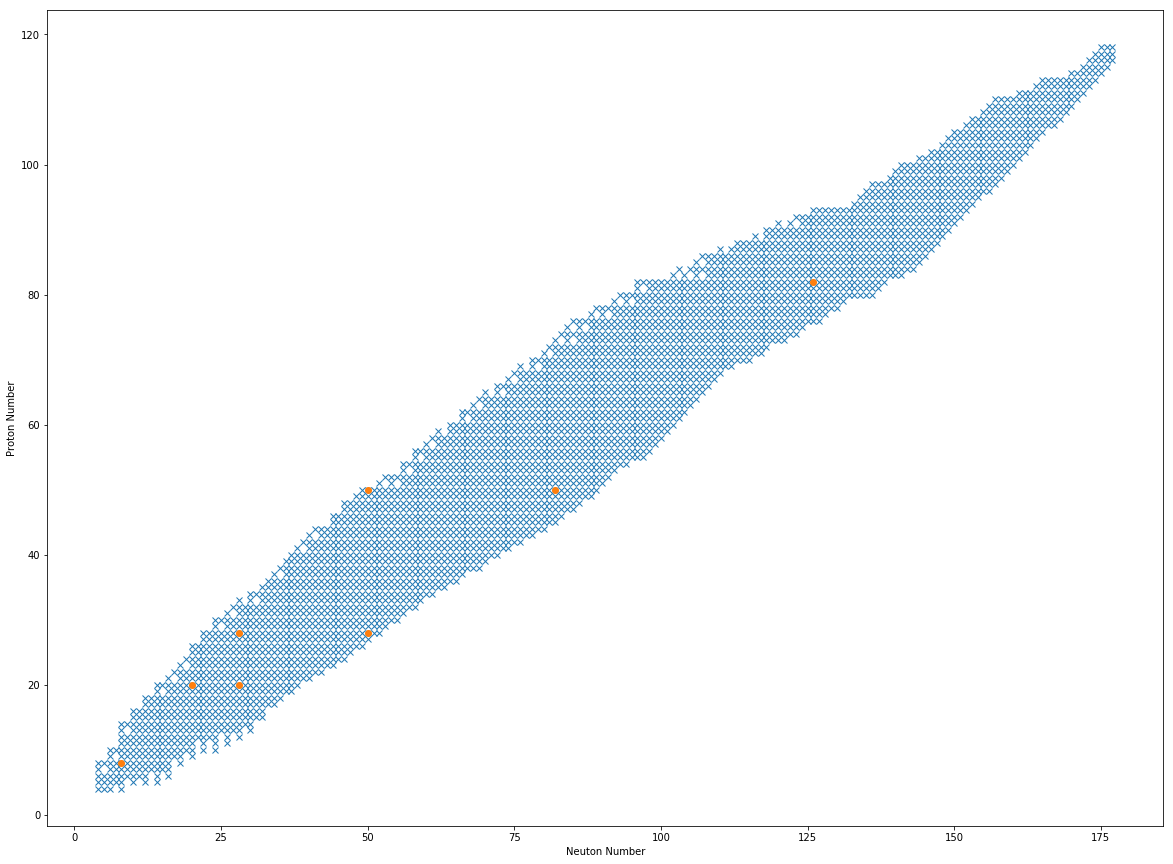

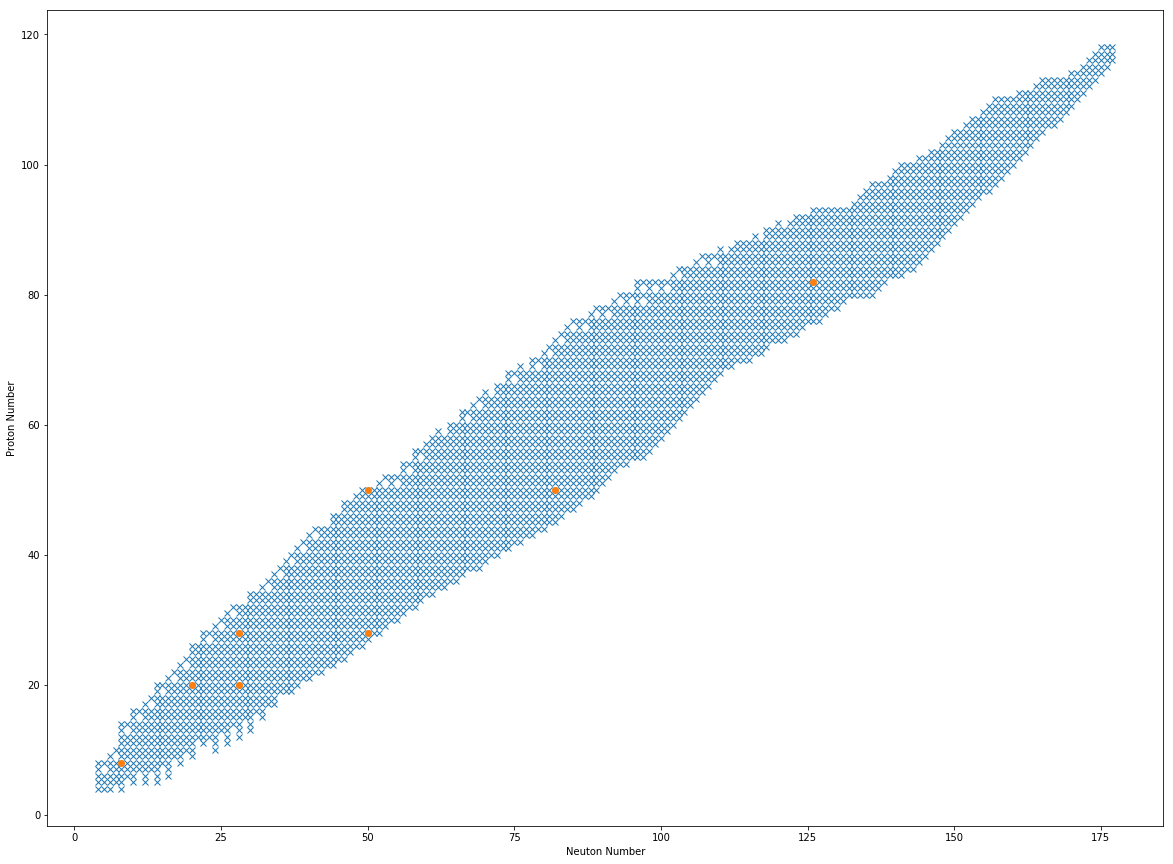

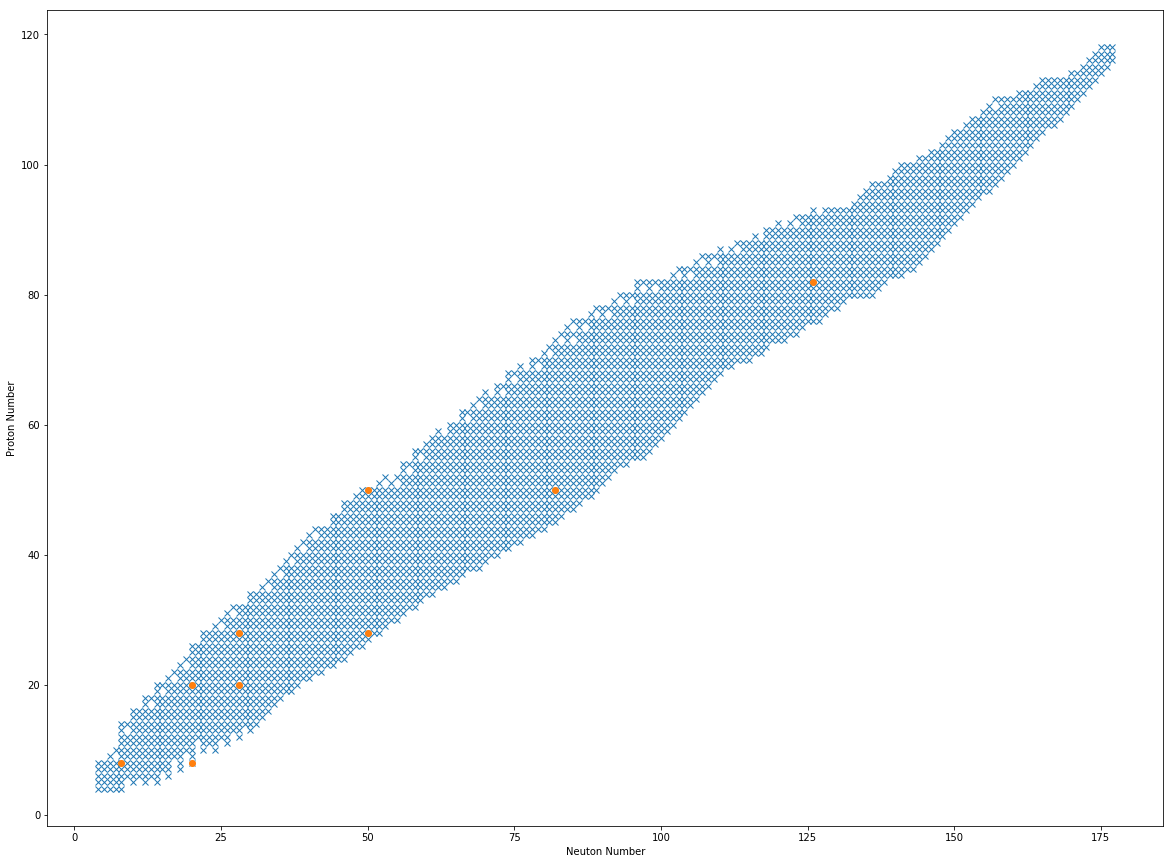

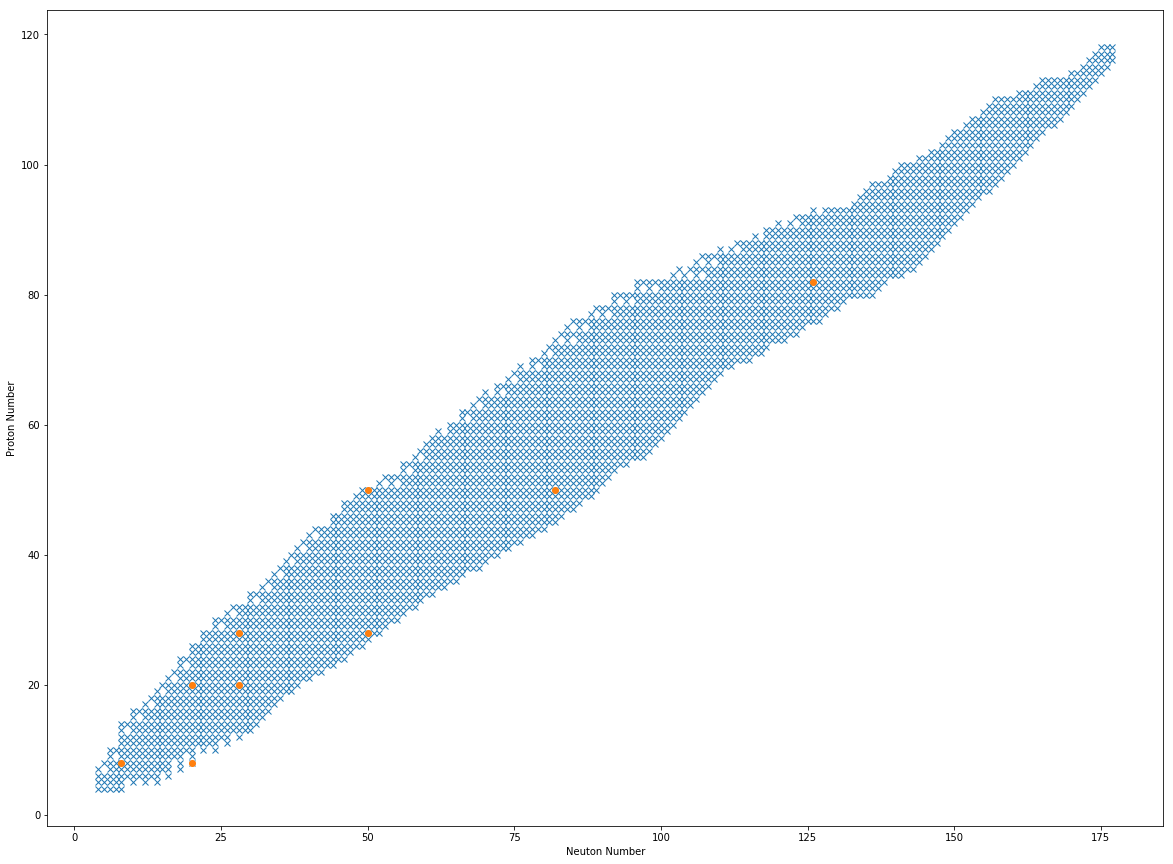

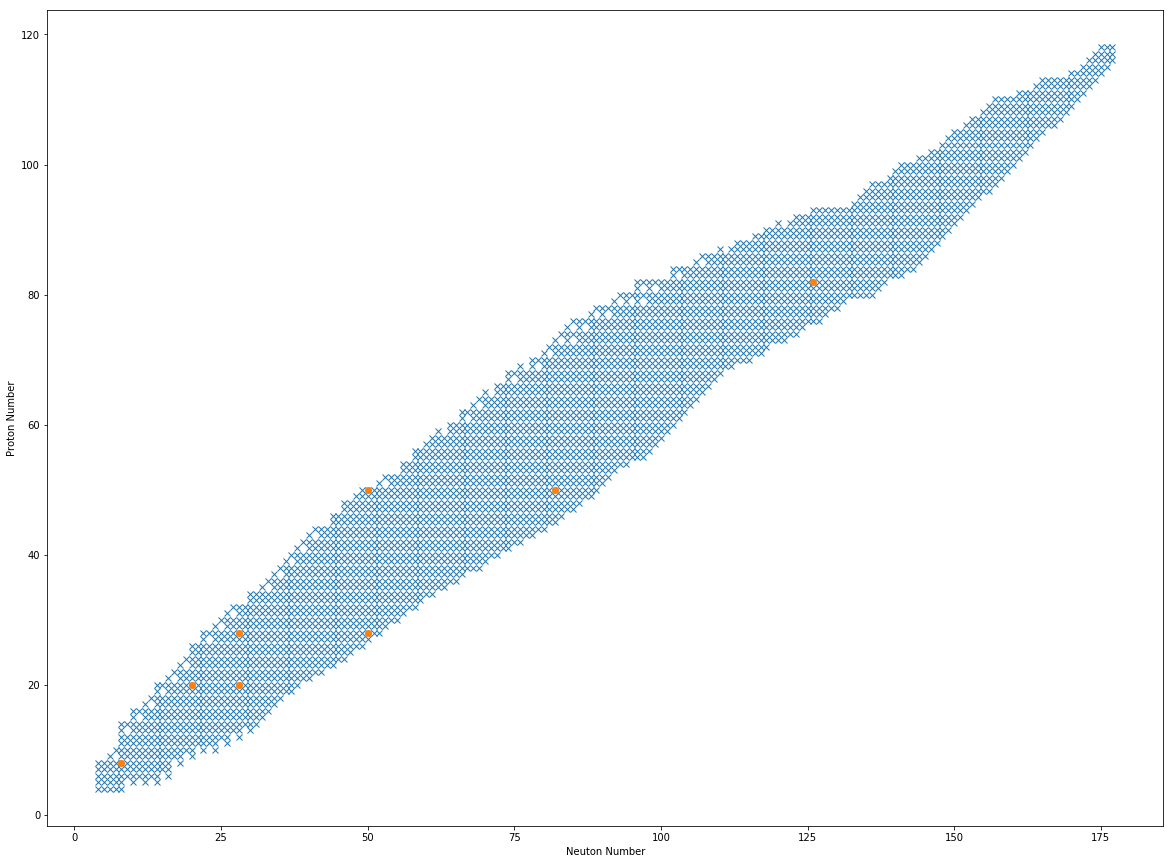

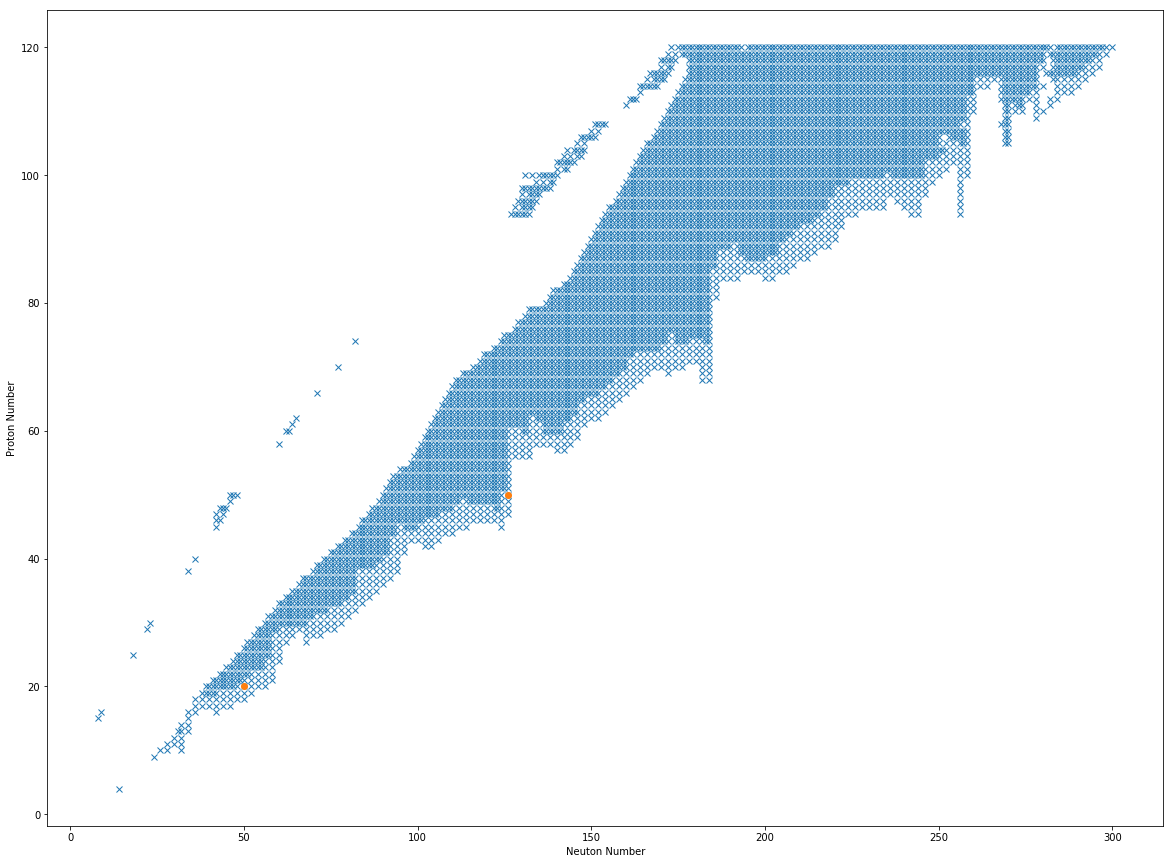

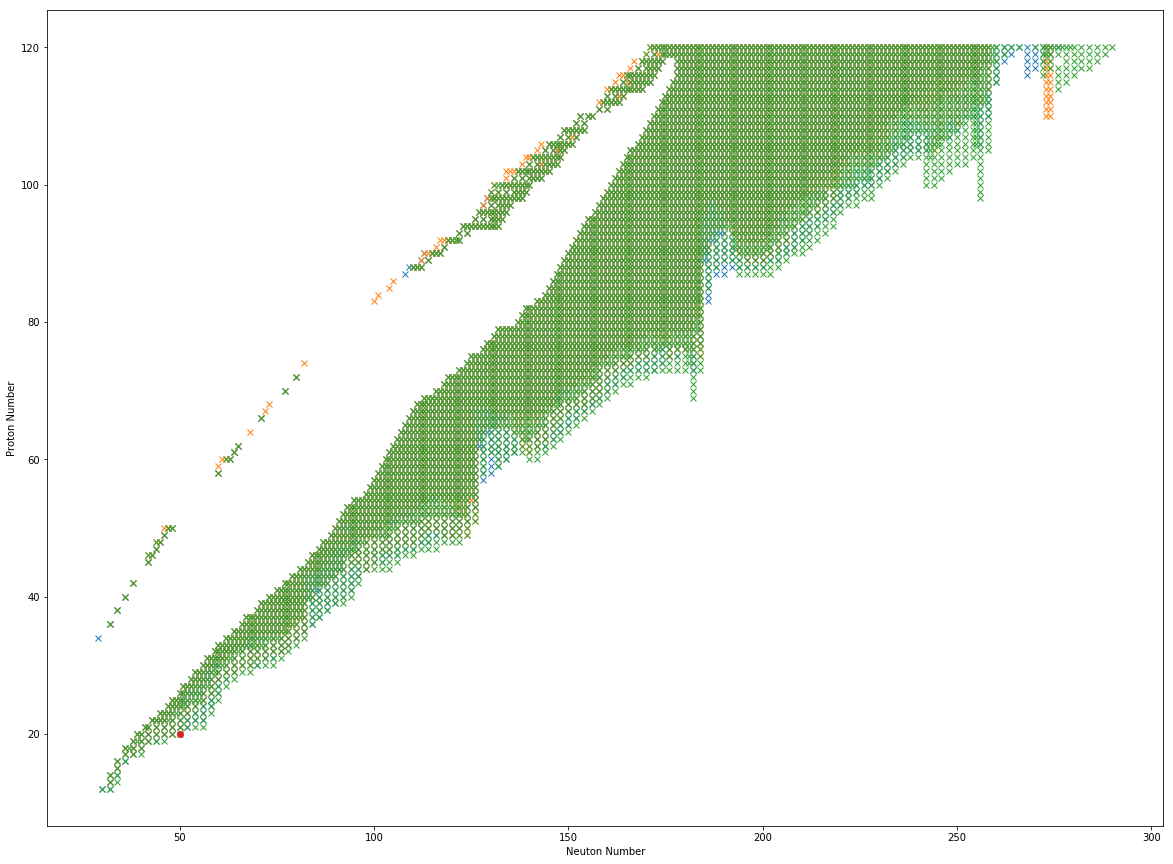

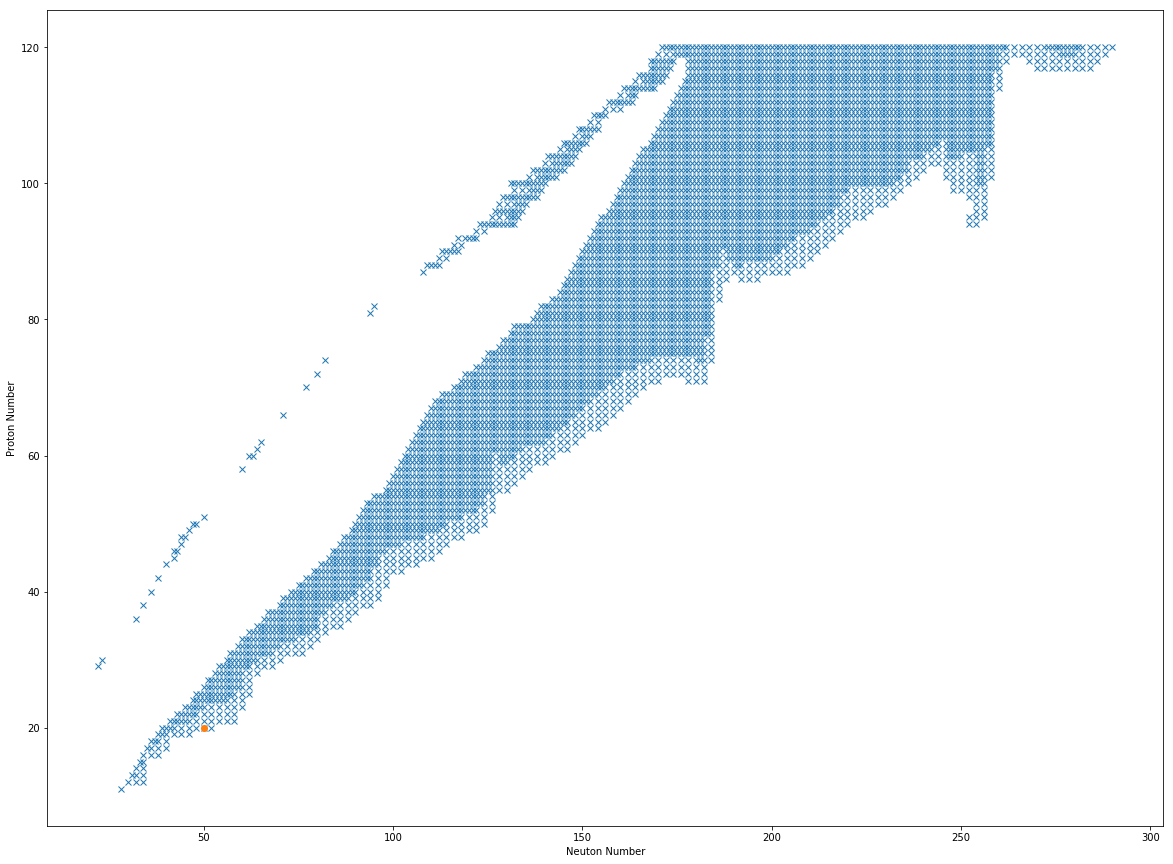

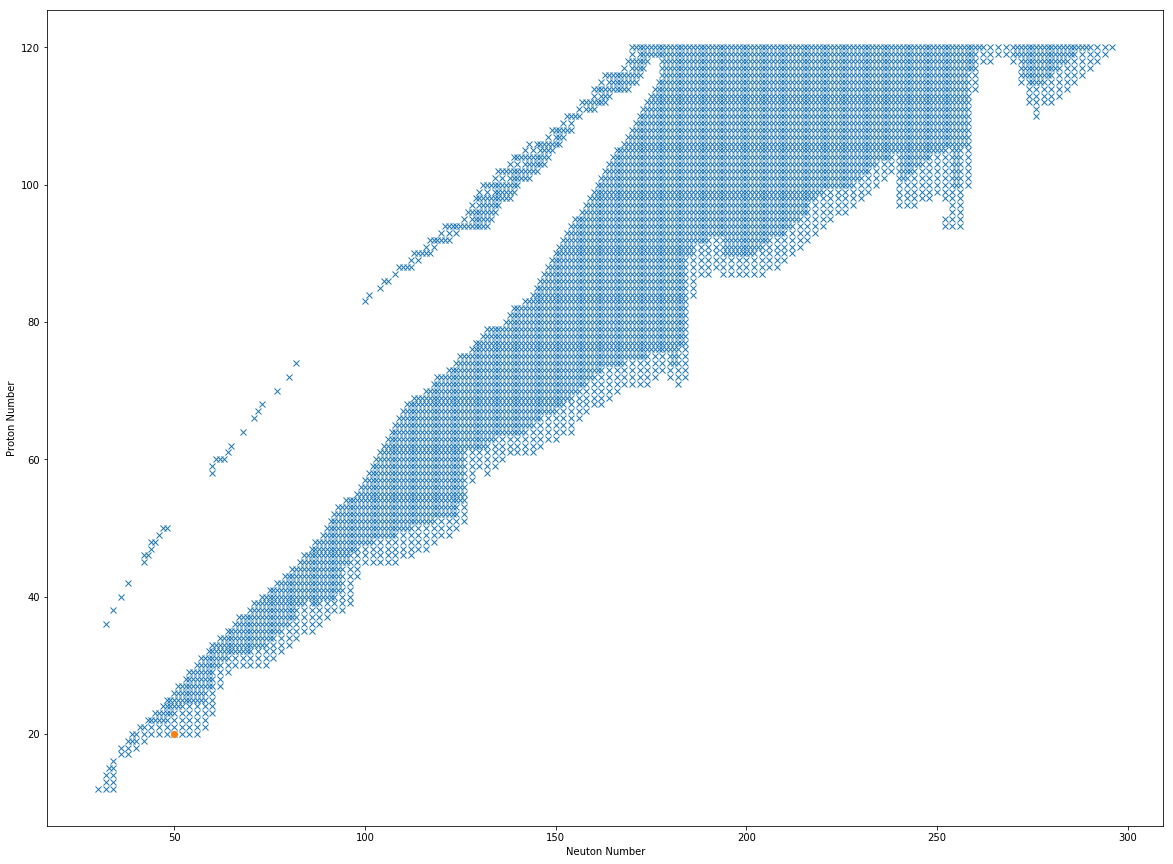

In [15]:

#c=[ 82, 126]
#d=[ 82, 126]

for i in range(0,6):    
    plt.plot(np.transpose(the_exp_mat_energies[i])[0],np.transpose(the_exp_mat_energies[i])[1],"x")
    plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"o")
    
    #plt.plot(a,b, "+", markersize=15)
    #plt.plot(np.transpose(combo)[0],np.transpose(combo)[1],'x')

    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.show()

    
for i in range(0,6):    
    plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1],"x")
    try:
        plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"o")
    except IndexError:
        continue
    #plt.plot(c,d, "+")
    #plt.plot(a,b, "+", markersize=15)
    
    #plt.plot(np.transpose(combo)[0],np.transpose(combo)[1],'x')

    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.show()
    
    
    

# Finding the Distances between every nuclei and the reference nuclei

In [16]:
all_in_dist         =[[],[],[],[],[],[]]
all_out_dist        =[[],[],[],[],[],[]]


exp_mat_in_dist     =[[],[],[],[],[],[]]
exp_mat_out_dist    =[[],[],[],[],[],[]]

no_mat_in_dist      =[[],[],[],[],[],[]]
no_mat_out_dist     =[[],[],[],[],[],[]]

for i in range(0,6):
    for j in the_no_mat_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1]
            #For Q: 5,3
            d.append(np.sqrt(vert**2+hori**2))
        
        no_mat_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 3,3
            d.append(np.sqrt(vert**2+hori**2))
        
        no_mat_out_dist[i].append(d)
      

    
for i in range(0,6):
    for j in the_exp_mat_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 5,5
            d.append(np.sqrt(vert**2+hori**2))
        
        exp_mat_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 3,5
            d.append(np.sqrt(vert**2+hori**2))
        
        exp_mat_out_dist[i].append(d)



for i in range(0,6):
    for j in the_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1]
            #For Q: 5, 3 
            d.append(np.sqrt(vert**2+hori**2))
        
        all_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[1]-j[1] 
            #For Q: 3, 3
            d.append(np.sqrt(vert**2+hori**2))
        
        all_out_dist[i].append(d)
        


# Making lists of distances

In [17]:
 
all_distances  =[[],[],[],[],[],[]]
out_distances  =[[],[],[],[],[],[]]
in_distances   =[[],[],[],[],[],[]]

for i in range(0,6):
    for j in range(0,len(the_energies[i])):
        a=all_in_dist[i][j]+all_out_dist[i][j]
        all_distances[i].append(np.array(a))
        
    for j in range(0,len(the_no_mat_energies[i])):
        a=no_mat_in_dist[i][j]+no_mat_out_dist[i][j]
        out_distances[i].append(np.array(a))
        
    
    for j in range(0,len(the_exp_mat_energies[i])):
        a=exp_mat_in_dist[i][j]+exp_mat_out_dist[i][j]
        in_distances[i].append(np.array(a))
     
    


# Array Display 

In [19]:
for i in range(0,6):
    k=1
    print(name[i])
    for j in in_refs[i]:
        print(k, " in_refs:  ", j[0],j[1])
        k=k+1
        
    k=1
    for j in out_refs[i]:
        print(k, " out_refs:  ", j[0],j[1])
        k=k+1
    

print("===============================================================================")
print("                        0 ||1,||      ||  2   ||            ||   ||     ||")
print("exp_energies:           N,||Z,||      || E_BE,||            ||   ||     ||")
print("===============================================================================")
print("                        0 ||1,||  2   ||      ||            || 3 ||   4 || 5")
print("the_energies:           N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p")
print("===============================================================================")
print("                        0 ||1,||  2   ||      ||            || 3 ||  4  || 5")
print("the_no_mat_energies:    N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p")
print("===============================================================================")
print("                        0 ||1,||  2   ||  3   ||     4      || 5 ||   6 || 7")
print("the_exp_mat_energies:   N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p")
print("===============================================================================\n\n\n\n")
 
for i in range(0,6):
    print(name[i])
    
    print("experimental:                  ", np.shape(exp_energies))
    print("Theoretical:                   ", np.shape(the_energies[i]))
    print("All distances:                 ", np.shape(all_distances[i]))    

    print("Theoretical that don't match:  ",  np.shape(the_no_mat_energies[i]))
    print("Out Distances:                 ", np.shape(out_distances[i]))    
    
    
    print("Theoretical that match:        ",  np.shape(the_exp_mat_energies[i]))
    print("In Distances:                  ", np.shape(in_distances[i]), "\n\n\n")    
    
    
    print(exp_energies[i], '\n')
    print(the_energies[i][0], '\n')
    print(all_distances[i][0], '\n')
    print(the_no_mat_energies[i][0], '\n')
    print(out_distances[i][0], '\n')
    print(the_exp_mat_energies[i][0], '\n')
    print(in_distances[i][0], '\n')
    
    
    


SKMS
1  in_refs:   8.0 8.0
2  in_refs:   20.0 8.0
3  in_refs:   20.0 20.0
4  in_refs:   20.0 28.0
5  in_refs:   28.0 20.0
6  in_refs:   28.0 28.0
7  in_refs:   50.0 28.0
8  in_refs:   50.0 50.0
9  in_refs:   82.0 50.0
10  in_refs:   126.0 82.0
1  out_refs:   50.0 20.0
2  out_refs:   126.0 50.0
SKP
1  in_refs:   8.0 8.0
2  in_refs:   20.0 20.0
3  in_refs:   28.0 20.0
4  in_refs:   28.0 28.0
5  in_refs:   50.0 28.0
6  in_refs:   50.0 50.0
7  in_refs:   82.0 50.0
8  in_refs:   126.0 82.0
SLY4
1  in_refs:   8.0 8.0
2  in_refs:   20.0 20.0
3  in_refs:   28.0 20.0
4  in_refs:   28.0 28.0
5  in_refs:   50.0 28.0
6  in_refs:   50.0 50.0
7  in_refs:   82.0 50.0
8  in_refs:   126.0 82.0
SV-MIN
1  in_refs:   8.0 8.0
2  in_refs:   20.0 8.0
3  in_refs:   20.0 20.0
4  in_refs:   28.0 20.0
5  in_refs:   28.0 28.0
6  in_refs:   50.0 28.0
7  in_refs:   50.0 50.0
8  in_refs:   82.0 50.0
9  in_refs:   126.0 82.0
1  out_refs:   50.0 20.0
UNEDF0
1  in_refs:   8.0 8.0
2  in_refs:   20.0 8.0
3  in_refs:   20

In [20]:
all_features         =[[],[],[],[],[],[]]
train_test_features  =[[],[],[],[],[],[]]
out_features         =[[],[],[],[],[],[]]



for i in range(0,6):
    train_test_features[i].append(np.transpose(the_exp_mat_energies[i])[0])
    train_test_features[i].append(np.transpose(the_exp_mat_energies[i])[5])
    
    #for j in range(8,48):
    #    train_test_features[i].append(np.transpose(the_exp_mat_energies[i])[j])
        
    #in_distances[i]
    for j in np.transpose(in_distances[i]):
        train_test_features[i].append(j)
        
        
    train_test_features[i]=np.transpose(train_test_features[i])
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    out_features[i].append(np.transpose(the_no_mat_energies[i])[0])
    out_features[i].append(np.transpose(the_no_mat_energies[i])[3])
    
    #for j in range(6,46):
    #    out_features[i].append(np.transpose(the_no_mat_energies[i])[j])
    for j in np.transpose(out_distances[i]):
        out_features[i].append(j)
        
    
    out_features[i]=np.transpose(out_features[i])
    
    
    
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    all_features[i].append(np.transpose(the_energies[i])[0])
    all_features[i].append(np.transpose(the_energies[i])[3])
    #for j in range(6,46):
    #    all_features[i].append(np.transpose(the_energies[i])[j])
    for j in np.transpose(all_distances[i]):
        all_features[i].append(j)
        
    
    
    all_features[i]=np.transpose(all_features[i])
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    
    
    print(name[i])
    print(len(out_features[i])+len(train_test_features[i]))
    print(np.shape(all_features[i]))
    print(np.shape(out_features[i]))
    print(np.shape(train_test_features[i]),"\n")
    

SKMS
8687
(8687, 14)
(5430, 14)
(3257, 14) 

SKP
7465
(7465, 10)
(4188, 10)
(3277, 10) 

SLY4
7252
(7252, 10)
(3986, 10)
(3266, 10) 

SV-MIN
7911
(7911, 12)
(4632, 12)
(3279, 12) 

UNEDF0
8287
(8287, 12)
(5010, 12)
(3277, 12) 

UNEDF1
8311
(8311, 11)
(5024, 11)
(3287, 11) 



In [22]:
#find overlap of oberservables for new files 
#use integral 

train_test_target  =[[],[],[],[],[],[]]


out_NZ             =[[],[],[],[],[],[]]
out_NZ_d           =[{},{},{},{},{},{},]
train_test_NZ      =[[],[],[],[],[],[]]
train_test_NZ_d    =[{},{},{},{},{},{},]



out_target         =[[],[],[],[],[],[]]


pred_in            =[[],[],[],[],[],[]]
pred_out           =[[],[],[],[],[],[]]
pred_all           =[[],[],[],[],[],[]]

pred_in_d          =[{},{},{},{},{},{}]
pred_out_d         =[{},{},{},{},{},{}]

rf_object=[[],[],[],[],[],[]]

for i in range(0,6):
    train_test_NZ[i]        =np.stack((np.transpose(the_exp_mat_energies[i])[0],np.transpose(the_exp_mat_energies[i])[1]))
    train_test_NZ[i]        =np.transpose(train_test_NZ[i])
    
    
    
    train_test_target[i]    =np.transpose(the_exp_mat_energies[i])[4]
        
    out_NZ[i]               =np.stack((np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1]))
    out_NZ[i]               =np.transpose(out_NZ[i])
    #print(np.shape(train_test_target[i]))
    
    


for i in range(0,6):
    print(i,"a")
    rf_object[i]=RandomForestRegressor(n_estimators=1000)#, bootstrap=False,)
    X_train, X_test, y_train, y_test = train_test_split(train_test_features[i], train_test_target[i], test_size =0.25, random_state=42 )
    
    print(i,"b")
    rf_object[i].fit(X_train,y_train)
    print(i,"c")
    
    print("train score:  ", rf_object[i].score(X_train,y_train))
    print("test score:   ", rf_object[i].score(X_test,y_test))
    
    
    pred_tr      =rf_object[i].predict(X_train)
    pred_te      =rf_object[i].predict(X_test)
    pred_in[i]   =rf_object[i].predict(train_test_features[i])
    pred_out[i]  =rf_object[i].predict(out_features[i])
    pred_all[i]  =rf_object[i].predict(all_features[i])
    print(i,"d")
    
    print("mse: ", np.sqrt(mean_squared_error(pred_in[i], train_test_target[i])), "\n")
    

for i in range(4,6):
    for j in range(0,len(train_test_NZ[i])):
        pred_in_d[i][train_test_NZ[i][j][0],train_test_NZ[i][j][1]]= pred_in[i][j]
        
    for j in range(0,len(out_NZ[i])):
        pred_out_d[i][out_NZ[i][j][0],out_NZ[i][j][1]]=pred_out[i][j]


0 a
0 b
0 c
train score:   0.9981121400462774
test score:    0.9836847326060535
0 d
mse:  0.4961050296912753 

1 a
1 b
1 c
train score:   0.9955823582901988
test score:    0.9681978624571109
1 d
mse:  0.36522536240304454 

2 a
2 b
2 c
train score:   0.9973363948989432
test score:    0.9734690168576793
2 d
mse:  0.41112272018612356 

3 a
3 b
3 c
train score:   0.992692608302011
test score:    0.9438807315469602
3 d
mse:  0.3019502359875845 

4 a
4 b
4 c
train score:   0.9849757017549516
test score:    0.9035623142178313
4 d
mse:  0.2881476393893571 

5 a
5 b
5 c
train score:   0.9935984440125627
test score:    0.9044891476839068
5 d
mse:  0.38784273565785765 



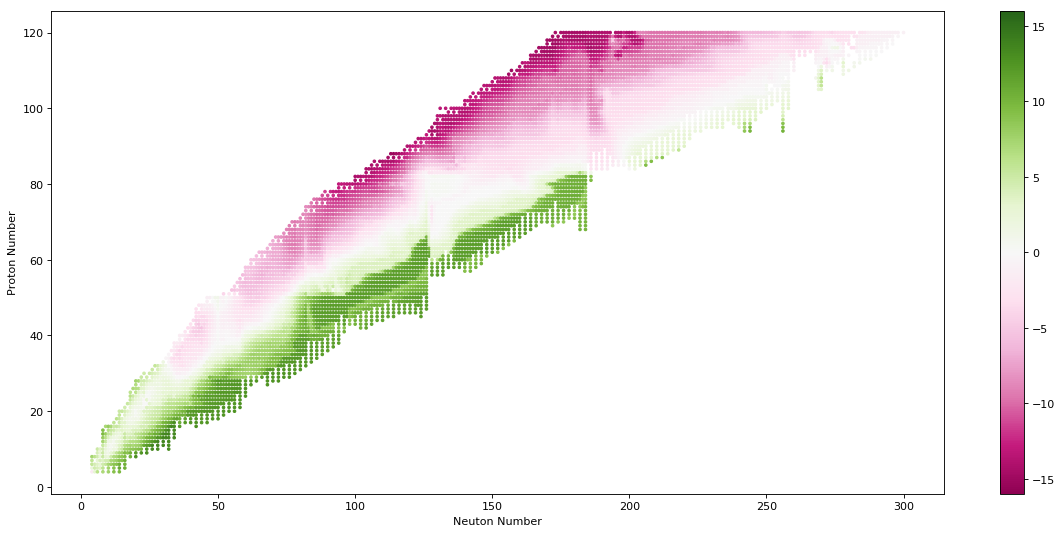

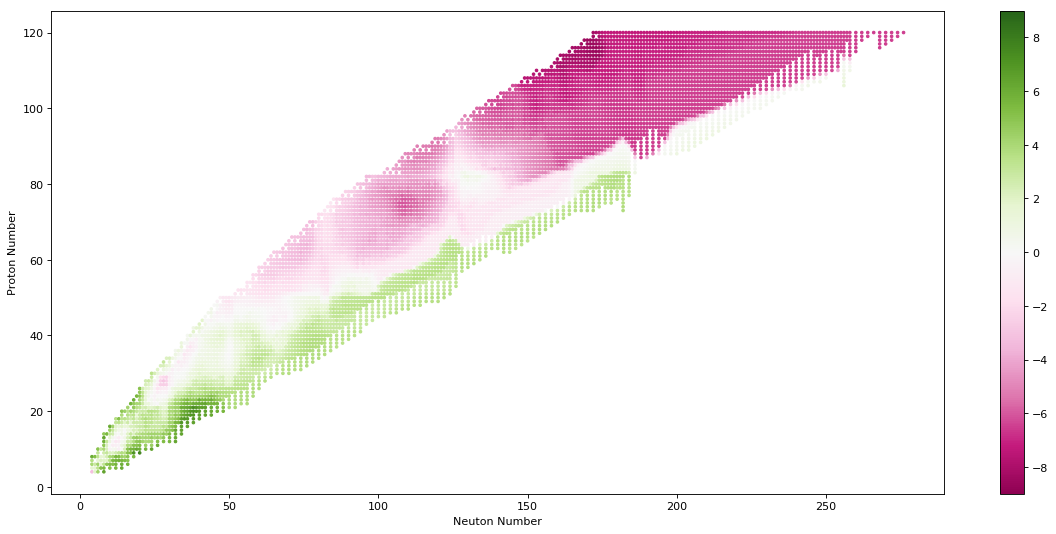

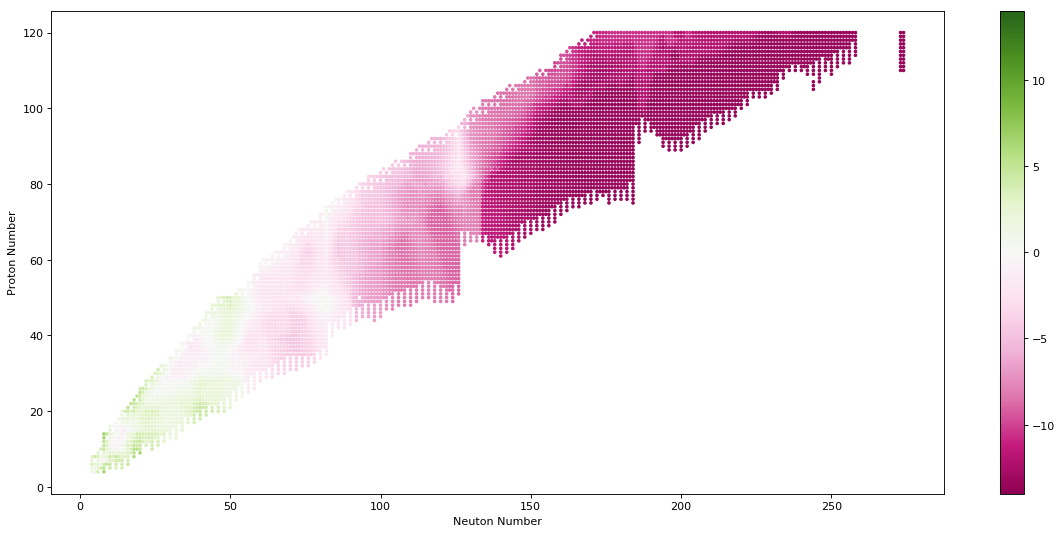

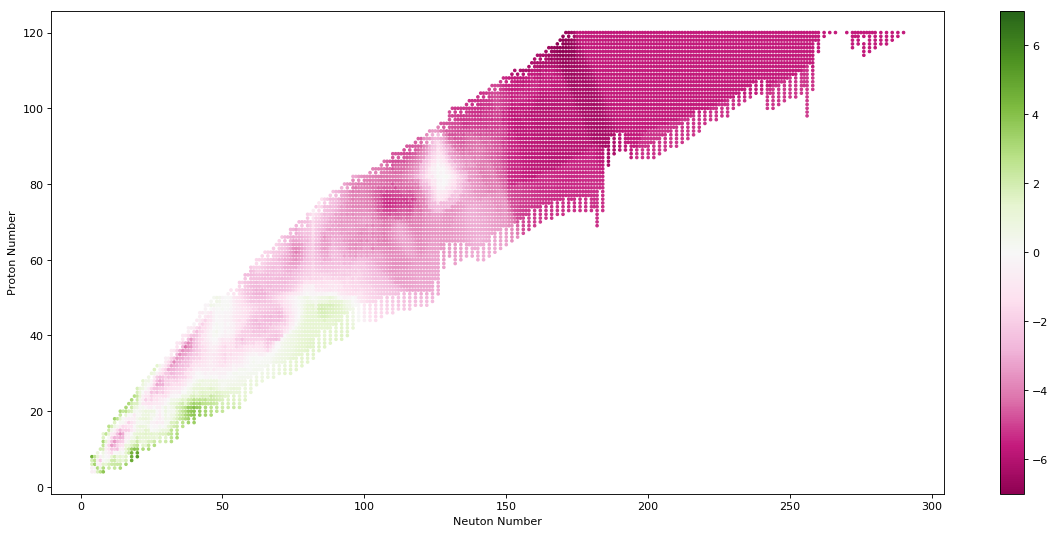

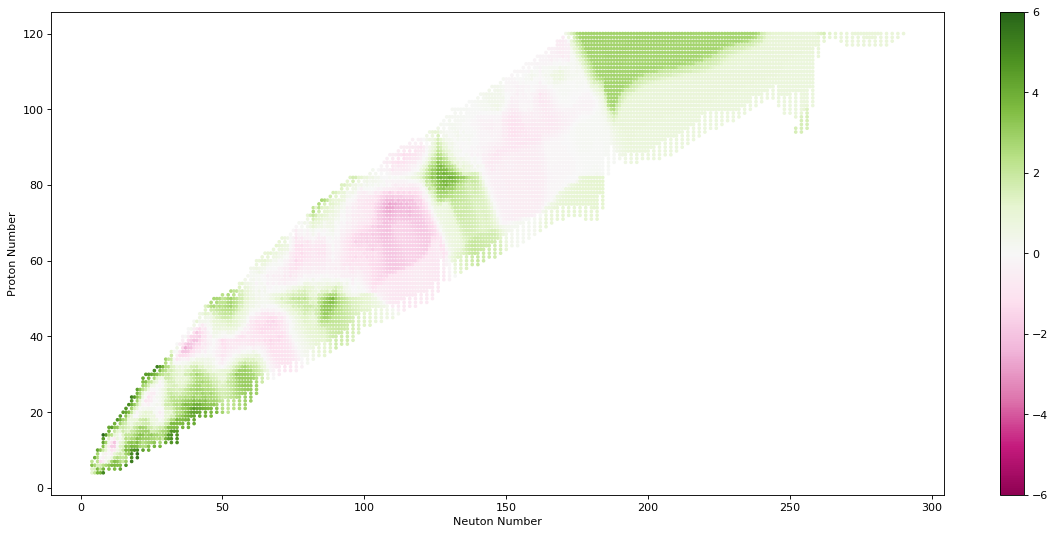

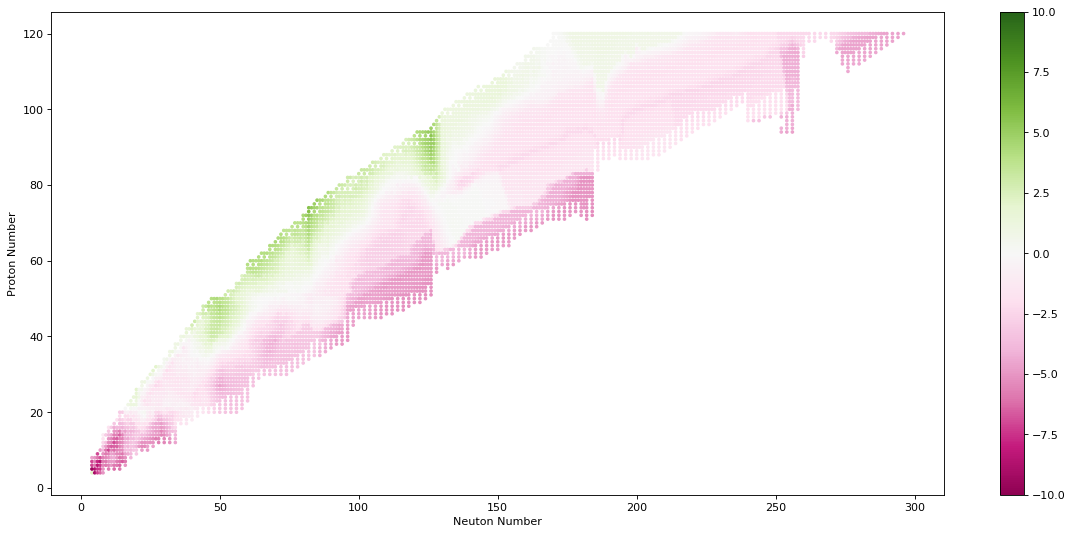

In [23]:
for i in range(0,6):
    ext = np.int(np.ceil(max(-np.min(pred_all[i]),np.max(pred_all[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(the_energies[i])[0],np.transpose(the_energies[i])[1],c=(pred_all[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    #plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"x")
    #plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(np.transpose(the_energies[i])),np.max(pred_all[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(the_energies[i])[0],np.transpose(the_energies[i])[1],c=(pred_all[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    #plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"x")
    #plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    
    
    """
    ext = np.int(np.ceil(max(-np.min(pred_in[i]),np.max(pred_in[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(train_test_NZ[i])[0],np.transpose(train_test_NZ[i])[1],c=(pred_in[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    #plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(pred_out[i]),np.max(pred_out[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(out_NZ[i])[0],np.transpose(out_NZ[i])[1],c=(pred_out[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    #plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    """
    

train score:   0.9934235276392759
test score:    0.9547054145392917
mse:  0.2916675911648652 

In [43]:
l=[[],[],[],[],[],[]]
for i in range(0,6):
    
    a=in_refs[i]+out_refs[i]
    
    k=[]
    """
    for j in range(0,len(a)):
        k.append((a[j][0],a[j][1]))
    
    #print(np.shape(k))
    print(rf_object[i].feature_importances_[2:]*100)
    ext = np.int(np.ceil(max(rf_object[i].feature_importances_[2:]*100)))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(k)[0],np.transpose(k)[1],c=(rf_object[i].feature_importances_[2:]*100),cmap='PiYG',vmax=ext,s=150)
    plt.plot(np.transpose(k[20:40])[0],np.transpose(k[20:40])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    """
    
    for j in range(0,len(in_refs[i])):
        if rf_object[i].feature_importances_[j+2]*100>=1:
            l[i].append((in_refs[i][j][0],in_refs[i][j][1],rf_object[i].feature_importances_[j+2]*100 ))
            print(j+2, "||||", in_refs[i][j][0], "||||", in_refs[i][j][1], "||||", rf_object[i].feature_importances_[j+2]*100)
    
    print("\n")
    for j in range(0,len(out_refs[i])):
        if rf_object[i].feature_importances_[j+22]*100>=1:
            l[i].append((out_refs[i][j][0],out_refs[i][j][1],rf_object[i].feature_importances_[j+22]*100 ))
            print(j+22, "||||", out_refs[i][j][0], "||||", out_refs[i][j][1], "||||", rf_object[i].feature_importances_[j+22]*100)
    print("\n")
    
    plt.plot(np.transpose(l[i])[0],np.transpose(l[i])[1], "x")
    plt.show()
    
    
    print("\n\n\n\n\n")
    
    # 1: 1, 25, 32, 34
    # 2: 1, 22, 25, 34, 36, 39
    # 3: 0, 1, 27,30, 31
    # 4: 0, 1, 5, 7, 8,9,10,11,12,23,24,26,31,38
    # 5: 0, 1, 2, 4, 7,8,9,10,13,15,17,18,19,20,23,33,35,36,41
    # 6: 0, 1, 2, 4, 5,7,14,15,18,23,24,27,34,40
         

AttributeError: 'list' object has no attribute 'feature_importances_'

In [94]:
for i in range(0,6):
    print(rf_object[i].feature_importances_, "\n\n")

[5.47620274e-04 8.50172083e-01 2.25052661e-04 3.05064759e-04
 6.33145448e-04 7.71989434e-04 1.31088184e-03 1.02941575e-03
 7.91283108e-04 2.75413799e-04 6.51689599e-04 5.35985566e-04
 5.78399834e-04 5.38476016e-04 4.95921921e-04 2.26661712e-04
 1.51216287e-03 2.27279111e-03 1.25098550e-03 2.38892504e-04
 1.92422429e-04 1.29446869e-04 3.78387980e-04 5.16592863e-04
 1.03860626e-03 3.56218661e-04 6.46300424e-04 1.02494773e-04
 5.89018895e-05 2.75012303e-04 6.20637949e-04 1.08647797e-03
 1.13958088e-04 8.31683647e-05 7.49272497e-05 1.15775571e-04
 2.90010610e-03 1.40830989e-03 8.01658029e-05 3.42488616e-04
 5.30775709e-05 1.24209468e-04 4.65975901e-05 7.32124047e-04
 1.36458223e-04 7.14963714e-04 6.46919105e-05 2.45446174e-05
 4.33349074e-05 5.98355653e-05 5.19752912e-05 1.28020813e-03
 1.32355647e-03 3.75532581e-04 2.11699380e-04 3.43884040e-04
 1.30358989e-04 1.74058897e-05 8.32687995e-04 1.82610302e-03
 8.85108363e-04 1.16815606e-04 6.03109197e-05 1.12594250e-04
 6.80627860e-05 7.966652